In [1]:
from google.colab import files
uploaded = files.upload()

Saving labeled_boycott (11).csv to labeled_boycott (11).csv


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. Load Data
df = pd.read_csv("labeled_boycott (11).csv")  # Ganti dengan nama file kamu
texts = df['Sebelum Tokenization']
labels = df['Setelah Pelabelan']  # Kolom 'label' berisi nilai: 'pro', 'kontra', atau 'netral'

# 2. TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=6000)
X = vectorizer.fit_transform(texts)
y = labels

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train SVM
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# 5. Evaluate
y_pred = svm.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Akurasi: 0.9248210023866349

Classification Report:
               precision    recall  f1-score   support

      kontra       0.93      0.92      0.92       300
      netral       0.88      0.96      0.92       296
         pro       0.98      0.89      0.93       242

    accuracy                           0.92       838
   macro avg       0.93      0.92      0.93       838
weighted avg       0.93      0.92      0.92       838


Confusion Matrix:
 [[275  25   0]
 [  7 284   5]
 [ 14  12 216]]


In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. Load Data
df = pd.read_csv("labeled_boycott (11).csv")  # Ganti dengan nama file kamu
texts = df['Sebelum Tokenization']
labels = df['Setelah Pelabelan']  # Label: 'pro', 'kontra', atau 'netral'

# 2. TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=6000)
X = vectorizer.fit_transform(texts)
y = labels

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Apply SMOTE on training data (only)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 5. Train SVM
svm = SVC(kernel='linear')
svm.fit(X_train_smote, y_train_smote)

# 6. Evaluate
y_pred = svm.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Distribusi label sebelum SMOTE:", Counter(y_train))
print("Distribusi label setelah SMOTE:", Counter(y_train_smote))

Akurasi: 0.9355608591885441

Classification Report:
               precision    recall  f1-score   support

      kontra       0.96      0.94      0.95       272
      netral       0.89      0.96      0.93       289
         pro       0.97      0.91      0.94       277

    accuracy                           0.94       838
   macro avg       0.94      0.94      0.94       838
weighted avg       0.94      0.94      0.94       838


Confusion Matrix:
 [[255  16   1]
 [  4 278   7]
 [  8  18 251]]
Distribusi label sebelum SMOTE: Counter({'netral': 1156, 'pro': 1108, 'kontra': 1088})
Distribusi label setelah SMOTE: Counter({'netral': 1156, 'pro': 1156, 'kontra': 1156})


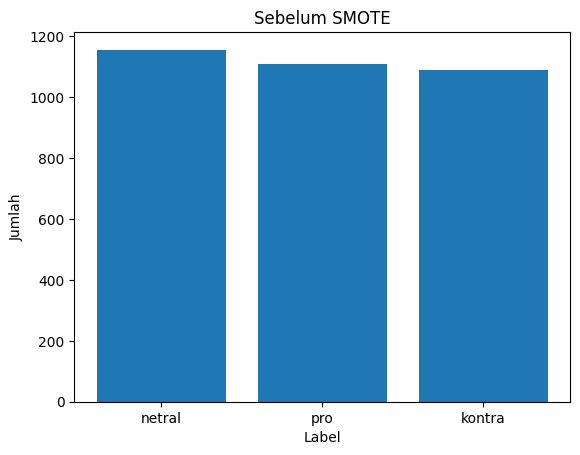

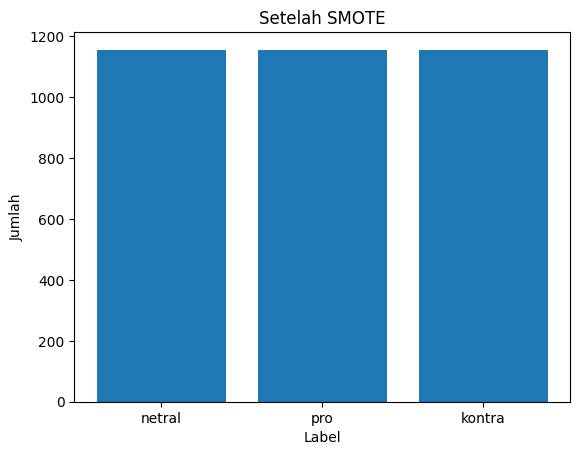

In [5]:
import matplotlib.pyplot as plt

def plot_label_distribution(y_data, title):
    label_counts = Counter(y_data)
    plt.bar(label_counts.keys(), label_counts.values())
    plt.title(title)
    plt.xlabel('Label')
    plt.ylabel('Jumlah')
    plt.show()

plot_label_distribution(y_train, "Sebelum SMOTE")
plot_label_distribution(y_train_smote, "Setelah SMOTE")

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. Load Data
df = pd.read_csv("labeled_boycott (11).csv")  # Ganti dengan nama file kamu
texts = df['Sebelum Tokenization']
labels = df['Setelah Pelabelan']

# 2. TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=6000)
X = vectorizer.fit_transform(texts)
y = labels

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Train SVM dengan kernel RBF
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

# 5. Evaluate
y_pred = svm.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Akurasi: 0.9248210023866349

Classification Report:
               precision    recall  f1-score   support

      kontra       0.97      0.92      0.94       272
      netral       0.84      0.99      0.91       289
         pro       1.00      0.86      0.92       277

    accuracy                           0.92       838
   macro avg       0.94      0.92      0.93       838
weighted avg       0.93      0.92      0.93       838


Confusion Matrix:
 [[249  23   0]
 [  1 287   1]
 [  6  32 239]]


In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. Load Data
df = pd.read_csv("labeled_boycott (11).csv")  # Ganti dengan nama file kamu
texts = df['Sebelum Tokenization']
labels = df['Setelah Pelabelan']  # Label: 'pro', 'kontra', atau 'netral'

# 2. TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=6000)
X = vectorizer.fit_transform(texts)
y = labels

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Apply SMOTE on training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 5. Train SVM with RBF kernel
svm = SVC(kernel='rbf')  # Ubah dari 'linear' ke 'rbf'
svm.fit(X_train_smote, y_train_smote)

# 6. Evaluate
y_pred = svm.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Distribusi label sebelum SMOTE:", Counter(y_train))
print("Distribusi label setelah SMOTE:", Counter(y_train_smote))

Akurasi: 0.9248210023866349

Classification Report:
               precision    recall  f1-score   support

      kontra       0.97      0.92      0.94       272
      netral       0.84      0.99      0.91       289
         pro       1.00      0.86      0.92       277

    accuracy                           0.92       838
   macro avg       0.94      0.92      0.93       838
weighted avg       0.93      0.92      0.93       838


Confusion Matrix:
 [[249  23   0]
 [  1 287   1]
 [  6  32 239]]
Distribusi label sebelum SMOTE: Counter({'netral': 1156, 'pro': 1108, 'kontra': 1088})
Distribusi label setelah SMOTE: Counter({'netral': 1156, 'pro': 1156, 'kontra': 1156})
